# Data project: Price cycles in the market for prescription drugs after patent expiry

## Content
### 1. Introduction
### 2. Data reading, cleaning and selecting
### 3. Expectations to the market mechanisms (normal situation)
### 4. Analyzing the drug Lamotrigin (price cycles)
### 5. Coonclusion


## 1. Introduction

In this project we will attempt to show the cyclic behaviour in some medical prices after the patent has expired, observed by the study "Priscykler i markedet for receptpligtig medicin efter patentudløb”. It will serve to demonstrate the matter of possible colusion by involving key points from competition theory by Maskin and Tirole (1988). In the empirical analysis we will investigate whether these cycles appears in data for the danish medicine prices in the period 2nd febuary 2015 - 23rd of marts 2020. 

Pharmaceutical manufacturers in Denmark sell medicines through two channels: the primary healthcare sector, which involves sales to the pharmacies, and the secondary sector in which sales are made to
hospitals. 

Before the competing phase, the company that developed the drug has a patent. The patent creates an incentive for the company to invest in new medicines, and with the exclusive right to sell the drug for a number of years, the company can receive research and production costs. In the period when the patent is valid, the market can be characterized as monopolistic and may have an inelastic demand curve, depending on of the type of drug. 

After the expiry of the patent, the prices of drugs that are sold to the pharmacies directly by the competing companies. Every 14 days, companies have the opportunity to report a new price electronically, where the company has
has bid the lowest price in the same substitution group, wins the bidding round. The pharmacists are obliged to offer patients the cheapest drug within the same substitute group,
and thus the company secures the largest market share, approx. 70 per cent until the next bidding round (”Priscykler i markedet for receptpligtig medicin efter patentudløb” p. 2). 

The data we will be working with in this project is containing these exactly 14-days prices.

## 2. Data reading, cleaning and selecting

Import and set magics: 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import dataproject

In [2]:
#1. Importing excel sheet for analysis
medprices_dk = pd.read_excel('meddata.xlsx')

In [3]:
# 2. Editing frame structure

english = {'Lægemiddel':'Medicine', 
                  'Varenummer':'Product_number', 
                  'Pakning':'Packaging', 
                  'Styrke':'Strength', 
                  'Firma':'Company', 
                  'Indikator':'Indicator'}
medprices_dk.rename(columns = english, inplace=True) # Convert columns from Danish to English

column_v = list(medprices_dk.columns.values) # Create list of dataframes column names
column_v= column_v[8:]# narrow list to only focus on date variables, as the variables start from coloumn 9 i the datasheet

date_to_string = {} # Create dictionary for renaming date variables

# Loop throught all possible date variables and add an e in front as variables in python cannot begin with a numbers
for i in column_v:
    date_to_string[i] = f'e{i}'

medprices_dk.rename(columns = date_to_string, inplace=True) # Rename date variables in primary dataframe





## 3. Expectations to the market mechanisms (normal situation)

According to theory, the transition from a monopolistic market state to complete competition should push down the prices of medicines, as several players can enter the market. As the price moves towards marginal costs, fiercer competition arises. Of course, there may be supply or demand shocks, costly entry barriers, etc., but all else equal, the price should fall after patent expiry. 

In order to illustrate this, we have found a drug with an expiry of the patent in april 2015. 
The drug is named Aripiprazole, and is a treatment of psychoses.


In [4]:
# 3. Focusing on the medicine Aripiprazol

medprices_dk_copy2 = medprices_dk.copy() # Making a copy of the dataset

aripiprazol2=medprices_dk_copy2.loc[medprices_dk_copy2['Medicine'].isin(['Aripiprazol "Accord Healthcare"', 'Aripiprazol "Krka"','Aripiprazol "Stada"','Aripiprazol "Accord"','Aripiprazol "Aristo"','Aripiprazol "Medical Valley"','Aripiprazol "Sandoz"','Aripiprazol "Teva"']) ] # Narrowing down to only companies selling Aripiprazol

a=aripiprazol2.Indicator.str.contains('AUP_pr_DDD') # Focusing on the relative price
aripiprazol2=aripiprazol2.loc[a, :] # Creating an index for dataframe  

drop_list=['ATC', 'Form', 'Medicine'] # Dropping columns

In [5]:
# 4. Create long format of dataframe 

aripiprazol_long= pd.wide_to_long(aripiprazol2, stubnames='e', i="Product_number", j='Date') # Created long format of the lamotrigin Dataframe

aripiprazol_long= aripiprazol_long.sort_values(['Date','Product_number']) # Organized product number by date

In [6]:

aripiprazol_long.isnull().sum() # Explore how many null values are in each column of your dataset


Form            0
Packaging       0
Medicine        0
Strength        0
Company         0
Indicator       0
ATC             0
e            1623
dtype: int64

In [7]:
aripiprazol_long=aripiprazol_long[aripiprazol_long['e'].notna()] # Deleting all the empty prices in the dataset

aripiprazol_long.isnull().sum() # Explore how many null values are in each column of the dataset now

Form         0
Packaging    0
Medicine     0
Strength     0
Company      0
Indicator    0
ATC          0
e            0
dtype: int64

In [8]:
aripiprazol_long.rename(columns={"e": "Price"}, inplace=True) #Renaming the price column 'e' to 'Price'

In [9]:
aripiprazol_long.loc[aripiprazol_long['Packaging'] == '56 stk. (blister)'] #Focusing on a specific packaging, the make sure the price is compatable

,,Form,Packaging,Medicine,Strength,Company,Indicator,ATC,Price
Product_number,Date,,,,,,,,
52737,20150202,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",5 mg,Krka AB,AUP_pr_DDD,N05AX12,119.304120
88445,20150202,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",15 mg,Krka AB,AUP_pr_DDD,N05AX12,29.277679
107657,20150202,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",10 mg,Krka AB,AUP_pr_DDD,N05AX12,57.091581
113143,20150202,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",30 mg,Krka AB,AUP_pr_DDD,N05AX12,33.058929
52737,20150216,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",5 mg,Krka AB,AUP_pr_DDD,N05AX12,112.714952
...,...,...,...,...,...,...,...,...,...
107657,20200323,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",10 mg,Krka AB,AUP_pr_DDD,N05AX12,2.350467
113143,20200323,tabletter,56 stk. (blister),"Aripiprazol ""Krka""",30 mg,Krka AB,AUP_pr_DDD,N05AX12,0.723214
197123,20200323,tabletter,56 stk. (blister),"Aripiprazol ""Stada""",30 mg,PharmaCoDane,AUP_pr_DDD,N05AX12,0.723214


In [10]:
del aripiprazol_long['Indicator'] #Deleting column

In [11]:
del aripiprazol_long['Packaging'] #Deleting column

In [12]:
del aripiprazol_long['Strength'] #Deleting column

In [13]:
e_min = aripiprazol_long.groupby('Date').min() # Finding the lowest price per date. Thereby the company who won the oppportunity to sell the drug to the bidding price.
e_min


,Form,Medicine,Company,ATC,Price
Date,,,,,
20150202,tabletter,"Aripiprazol ""Krka""",Krka AB,N05AX12,29.277679
20150216,tabletter,"Aripiprazol ""Krka""",Krka AB,N05AX12,26.837500
20150302,tabletter,"Aripiprazol ""Krka""",Krka AB,N05AX12,21.958036
20150316,tabletter,"Aripiprazol ""Krka""",Krka AB,N05AX12,20.006250
20150330,tabletter,"Aripiprazol ""Krka""",Krka AB,N05AX12,17.078571
...,...,...,...,...,...
20200127,oral opløsning,"Aripiprazol ""Krka""",Krka AB,N05AX12,0.579464
20200210,oral opløsning,"Aripiprazol ""Krka""",Krka AB,N05AX12,0.715500
20200224,oral opløsning,"Aripiprazol ""Krka""",Krka AB,N05AX12,0.715500


In [14]:
# Creating a new variable Date1
e_min['Date1'] = e_min.index #indexing by e_min
e_min
e_min.dtypes #Checking the variable type of Date1

Form         object
Medicine     object
Company      object
ATC          object
Price       float64
Date1         int64
dtype: object

In [15]:
# convert date to date format
e_min['DateTime'] = e_min['Date1'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

#### Plotting Asipiprazol

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 7 Text xticklabel objects>)

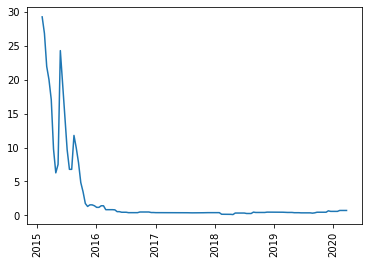

In [16]:
# Creating plot
e_min_plot=e_min.sort_values('DateTime', ascending=True)
plt.plot(e_min_plot['DateTime'], e_min_plot['Price'])
plt.xticks(rotation='vertical')

At the beginning of 2015,full-year forecasts were expected to see a major fall in prices for the drug immediately following the expiry of the patent, ie April 2015. However, the price falls did not break through until the end of 2015. Price falls are now at 80-90%.
When the patent expires every company is allowed to bid in order to sell the medicine in the pharmacy. There is a bidding every two weeks, where the company there bids the lowest price win. This i visualizedin the graph, where it i showned that the biddingwar accelerate in the end of 2015, and pushes the price down to marginal cost.  

## 4. Analyzing the drug Lamotrigin (price cycles)


### We have showned how the price bidding pushes the price down, which is compatable to theory of perfect competition. However this is not always the case, for medicine after the patent expires. Some Companies engage in price cycles, where they push the price down, until a certain point, and then they raise the price again, and continuing this behavior.
### In this section we will visualize this behavior, which is found for the drug Lamotrigin

In [17]:
# 5. Focusing on the medicine Aripiprazol
medprices_dk_copy = medprices_dk.copy()

lamotrigin=medprices_dk_copy.loc[medprices_dk_copy['Medicine'].isin(['Lamotrigin "1A Farma"', 'Lamotrigin "Stada"', 'Lamotrigin "Orifarm"','Lamotrigin "Bluefish"','Lamotrigin "Aurobindo"', 'Lamotrigin "Amneal"', 'Lamotrigin "Abacus Medicine"', 'Lamotrigin "Mylan"']) ] # Narrowing down to only companies selling Lamotrigin 

I=lamotrigin.Indicator.str.contains('AUP_pr_DDD') # Focusing on the relative price
lamotrigin=lamotrigin.loc[I, :] # Creatin an index for the datafram

drop_list=['ATC', 'Form', 'Medicine'] # Dropping columns
lamotrigin.drop(drop_list, axis=1, inplace=True)


In [18]:
# 6. Create long format of dataframe 

lamotrigin_long= pd.wide_to_long(lamotrigin, stubnames='e', i="Product_number", j='Date') # Created long format of the lamotrigin Dataframe

lamotrigin_long= lamotrigin_long.sort_values(['Product_number','Date']) # Organized product number by date

In [19]:
lamotrigin_long.isnull().sum() # Explore how many null values are in each column of your dataset

Indicator       0
Packaging       0
Strength        0
Company         0
e            2517
dtype: int64

In [20]:
lamotrigin_long=lamotrigin_long[lamotrigin_long['e'].notna()] # Deleting all the nulls in the price column 'e'

lamotrigin_long.isnull().sum() # Making sure there are no more missing variables

Indicator    0
Packaging    0
Strength     0
Company      0
e            0
dtype: int64

In [21]:
lamotrigin_long.rename(columns={"e": "Price"}, inplace=True) #Renaming the 'e' column to 'Price'

In [22]:
lamotrigin_long.loc[lamotrigin_long['Packaging'] == '50 stk. (blister)'] #Focusing on a specific packaging in order for the price to be compatable

Indicator          Packaging Strength       Company  \
Product_number Date                                                             
172849         20150202  AUP_pr_DDD  50 stk. (blister)   200 mg  1A Farma A/S   
               20150216  AUP_pr_DDD  50 stk. (blister)   200 mg  1A Farma A/S   
               20150302  AUP_pr_DDD  50 stk. (blister)   200 mg  1A Farma A/S   
               20150316  AUP_pr_DDD  50 stk. (blister)   200 mg  1A Farma A/S   
               20150330  AUP_pr_DDD  50 stk. (blister)   200 mg  1A Farma A/S   
...                             ...                ...      ...           ...   
552640         20150427  AUP_pr_DDD  50 stk. (blister)    50 mg  1A Farma A/S   
               20150511  AUP_pr_DDD  50 stk. (blister)    50 mg  1A Farma A/S   
               20150525  AUP_pr_DDD  50 stk. (blister)    50 mg  1A Farma A/S   
               20150608  AUP_pr_DDD  50 stk. (blister)    50 mg  1A Farma A/S   
               20150622  AUP_pr_DDD  50 stk. (blister)    50 mg  1A Farma A/S   

                            Price  
Product_number Date                
172849         20150202  1.599016  
               20150216  1.764018  
               20150302  1.764018  
               20150316  1.624516  
               20150330  1.624516  
...                           ...  
552640         20150427  4.944198  
               20150511  3.984159  
               20150525  3.384135  
               20150608  3.870155  
               20150622  3.708148  

[223 rows x 5 columns]

In [23]:
min_price = lamotrigin_long.groupby('Date').min() #Finding the lowest price per date. Thereby the company who won the oppportunity to sell the drug to the bidding price.
min_price.loc[min_price['Packaging'] == '50 stk. (blister)']

,Indicator,Packaging,Strength,Company,Price
Date,,,,,


In [24]:
# Creating a new variable Date1
min_price['Date2'] = min_price.index # Indexing by min_price
min_price
min_price.dtypes #Checking the variable type of Date2

Indicator     object
Packaging     object
Strength      object
Company       object
Price        float64
Date2          int64
dtype: object

In [25]:
# convert date to dateformat
min_price['DateTime'] = min_price['Date2'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

#### Plotting Lamotrigin

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 7 Text xticklabel objects>)

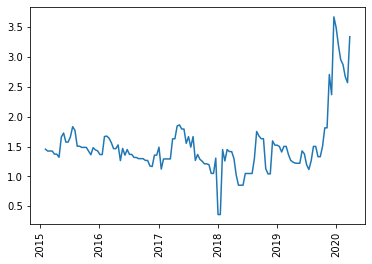

In [26]:
# 7. Creating plot
min_price_plot=min_price.sort_values('DateTime', ascending=True)
plt.plot(min_price_plot['DateTime'], min_price_plot['Price'])
plt.xticks(rotation='vertical')

It is visualized on the graph that the price bidding for the drug Lamotrigin behaves as price cycles. 

## 5. Conclusion

This project has showned the cleaning of the dataset for medicinprices from 2015-2020. The project has focused on the drugs Asipiprazol and Lamotrigin.
The project focused on the theory of perfect competition in medicine prices. Th drug Asipiprazol perefctly shows how this theory exists after patent expirey, whereas the drug Lamotrigin expirenced price cycles, and therefore does not follow the theory of perefct competition, but more the thory of price cycles from Maskin and Tirole. 
Whether or not there is tacit collusion in the medicine market can be speculated, but not proven in this project.